In [2]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

from matplotlib import pyplot as plt
import random
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# disconnect from Artemis
ble.disconnect()

In [238]:
# connect to Artemis
    
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-05-14 18:33:28,614 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:D5:66:86:3C
2023-05-14 18:33:31,084 | INFO     |: Connected to C0:83:D5:66:86:3C


In [90]:
# test sending and receiving

ble.send_command(CMD.PING, "")

s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

PONG


In [ ]:
# STATIC --- read and aggregate time, pitch, roll, yaw, TOF#1, TOF#2, leftPWM, rightPWM

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    #print(reading)
    
    for count in range(entries):
        try:
            nextPos = count*8
            time.append((reading[nextPos]))
            pitchC.append((reading[nextPos+1]))
            rollC.append((reading[nextPos+2]))
            yaw.append((reading[nextPos+3]))
            ONEDist.append((reading[nextPos+4]))
            TWODist.append((reading[nextPos+5]))
            leftPWM.append((reading[nextPos+6]))
            rightPWM.append((reading[nextPos+7]))
        except (IndexError,ValueError):
            continue
        
    
entries = 3
time = []
pitchC = []
rollC = []
yaw = []
ONEDist = []
TWODist = []
leftPWM = []
rightPWM = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.TIMED_PID_DATA, "")

In [140]:
# ANGSPEED --- PID to given angular velocity and read and aggregate time, pitch, roll, yaw, TOF#1, TOF#2, leftPWM, rightPWM

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    #print(reading)
    
    for count in range(entries):
        try:
            nextPos = count*7
            time.append((reading[nextPos]))
            target.append((reading[nextPos+1]))
            error.append((reading[nextPos+2]))
            yaw.append((reading[nextPos+3]))
            ONEDist.append((reading[nextPos+4]))
            rawY.append((reading[nextPos+5]))
            speed.append((reading[nextPos+6]))
        except (IndexError,ValueError):
            continue
        
    
entries = 3
time = []
target = []
error = []
yaw = []
ONEDist = []
rawY = []
speed = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.ANGSPEED, "3")

2023-05-14 17:41:19,695 | INFO     |: Disconnected from 9FB4D05A-FE1D-DF59-F920-0B9FD132922D


In [239]:
# LOCAILZATION --- PID to given angular velocity and read and aggregate time, pitch, roll, yaw, TOF#1, TOF#2, leftPWM, rightPWM

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    #print(reading)
    
    for count in range(entries):
        try:
            nextPos = count*7
            time.append((reading[nextPos]))
            target.append((reading[nextPos+1]))
            error.append((reading[nextPos+2]))
            yaw.append((reading[nextPos+3]))
            ONEDist.append((reading[nextPos+4]))
            rawY.append((reading[nextPos+5]))
            speed.append((reading[nextPos+6]))
        except (IndexError,ValueError):
            continue
        
    
entries = 3
time = []
target = []
error = []
yaw = []
ONEDist = []
rawY = []
speed = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.LOCALIZATION, "3")

In [246]:
print(yaw)
print(ONEDist)

['0', '-22', '-46', '-71', '-95', '-120', '-143', '-165', '169', '144', '120', '97', '73', '48', '26', '5', '-16', '-39', '5', '-16', '-39']
['429', '527', '391', '279', '250', '310', '467', '1266', '492', '413', '892', '799', '1129', '662', '487', '411', '423', '449', '411', '423', '449']


In [314]:
# place data into text files
with open('readings.txt', 'w') as f:
    for loc in range(0, 18):
        f.write(str(outDist[loc]))
        f.write('|')
        
with open('bearings.txt', 'w') as f:
    for loc in range(0, 18):
        f.write(str(fixedYaw[loc]))
        f.write('|')

In [315]:
# read out text files 
import numpy as np
with open('readings.txt') as f:
    lines = f.readlines()
    
strDist = lines[0].split("|")
intDist = np.array([eval(pos)/1000 for pos in strDist[:-1]])[np.newaxis]
print(intDist.T)

with open('bearings.txt') as f:
    lines = f.readlines()
    
strBear = lines[0].split("|")
intBear = np.array([eval(pos) for pos in strBear[:-1]])[np.newaxis]
print(intBear.T)

[[1.681]
 [3.199]
 [0.983]
 [0.781]
 [0.761]
 [2.156]
 [0.928]
 [0.618]
 [0.479]
 [0.418]
 [0.403]
 [0.484]
 [0.446]
 [0.356]
 [0.318]
 [0.345]
 [0.405]
 [0.498]]
[[   0]
 [ -20]
 [ -40]
 [ -60]
 [ -80]
 [-100]
 [-120]
 [-140]
 [-160]
 [ 180]
 [ 160]
 [ 140]
 [ 120]
 [ 100]
 [  80]
 [  60]
 [  40]
 [  20]]
2023-05-14 19:10:28,884 | INFO     |: Disconnected from 9FB4D05A-FE1D-DF59-F920-0B9FD132922D


In [311]:
print(ONEDist)
print(yaw)

print(len(yaw))
print(len(ONEDist))

['429', '527', '391', '279', '250', '310', '467', '1266', '492', '413', '892', '799', '1129', '662', '487', '411', '423', '449', '411', '423', '449']
['0', '-22', '-46', '-71', '-95', '-120', '-143', '-165', '169', '144', '120', '97', '73', '48', '26', '5', '-16', '-39', '5', '-16', '-39']
21
21


In [134]:
# stop notifications from this characteristic

ble.stop_notify(ble.uuid['RX_STRING'])

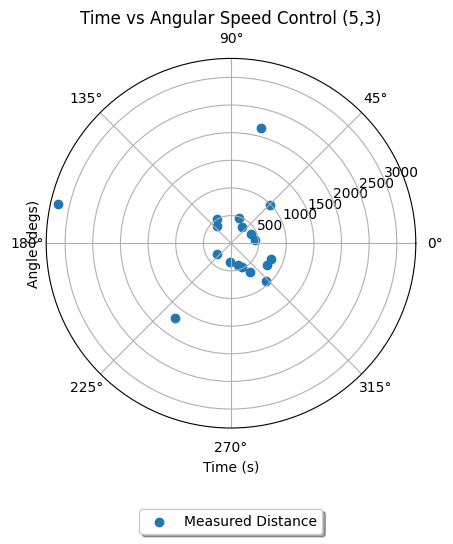

In [231]:
import random

# Collect all data points
intTarget = [eval(i) for i in target]
intError = [eval(i) for i in error]
intSpeed = [eval(i) for i in speed]

intTime = [eval(t)/1000 for t in time]

intAng = [eval(i) for i in rawY]
intYaw = [-eval(i) for i in yaw]

intDist = [eval(i) for i in ONEDist]

# Plot all graphs

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.scatter(rYaw, rDist, label = "Measured Distance")
#plt.scatter(intTime, intTarget, label = "Setpoint")
#plt.scatter(intTime, intAng, label = "Angular Speed")
#plt.scatter(intTime, intError, label = "Error")

#plt.scatter(intTime, intSpeed, label = "Speed")

#plt.scatter(intTime, intYaw, label = "Current Yaw")


plt.title("Time vs Angular Speed Control (5,3)")
plt.xlabel("Time (s)")
plt.ylabel("Angle (degs)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

#plt.xlim((139,142))
#plt.ylim((-500,2000))

#n3n2, p5n3, p0p3, p5p3


In [ ]:
intTarget = [eval(i) for i in target]
intError = [eval(i) for i in error]
intSpeed = [eval(i) for i in speed]

intTime = [eval(t)/1000 for t in time]

intAng = [eval(i) for i in rawY]
intYaw = [-eval(i) for i in yaw]

intDist = [eval(i) for i in ONEDist]

In [328]:
p5p3_Target = intTarget
p5p3_Error = intError
p5p3_Speed = intSpeed

p5p3_Time = intTime

p5p3_Ang = intAng
p5p3_Yaw = intYaw

p5p3_Dist = intDist

In [329]:
%store p5p3_Target
%store p5p3_Error
%store p5p3_Speed

%store p5p3_Time

%store p5p3_Ang
%store p5p3_Yaw

%store p5p3_Dist

Stored 'p5p3_Target' (list)
Stored 'p5p3_Error' (list)
Stored 'p5p3_Speed' (list)
Stored 'p5p3_Time' (list)
Stored 'p5p3_Ang' (list)
Stored 'p5p3_Yaw' (list)
Stored 'p5p3_Dist' (list)


In [233]:
print((p5p3_Yaw))

NameError: name 'p5p3_Yaw' is not defined

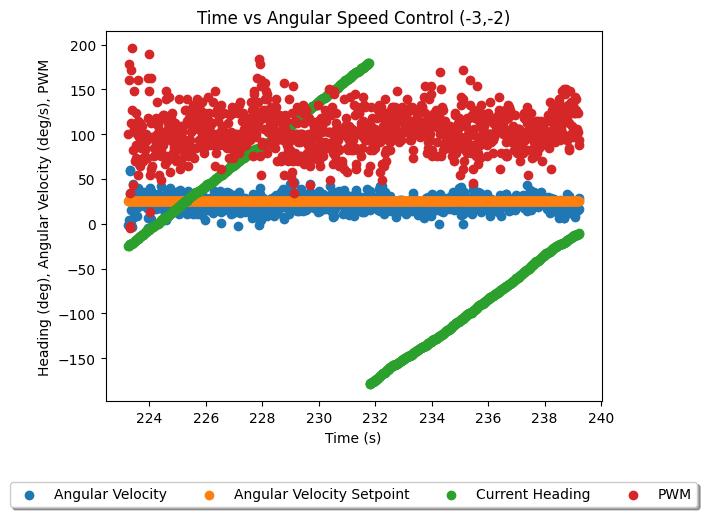

In [413]:
#plt.scatter(offsetY, p5p3_Dist, label = "Measured Distance")
#plt.scatter(intTime, p5p3_Dist, label = "Measured Distance")
plt.scatter(n3n2_Time, n3n2_Ang, label = "Angular Velocity")
plt.scatter(n3n2_Time, n3n2_Target, label = "Angular Velocity Setpoint")
plt.scatter(n3n2_Time, n3n2_Yaw, label = "Current Heading")

#plt.scatter(intTime, intError, label = "Error")

plt.scatter(n3n2_Time, n3n2_Speed, label = "PWM")

#plt.scatter(intTime, intYaw, label = "Current Yaw")

plt.title("Time vs Angular Speed Control (-3,-2)")
plt.xlabel("Time (s)")
plt.ylabel("Heading (deg), Angular Velocity (deg/s), PWM")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

#plt.xlim((139,142))
#plt.ylim((-500,2000))

#n3n2, p5n3, p0p3, p5p3


In [364]:
offsetY = [(item+180) for item in p5p3_Yaw]

In [206]:
print(p5p3_Yaw)
print(p5p3_Dist)

NameError: name 'p5p3_Yaw' is not defined

In [306]:
outYaw = [eval(i) for i in yaw]
#outDist = [eval(i) for i in rDist[9:18]]
outDist2 = rDist[9:18]
#outDist2 = [eval(i) for i in rDist[0:9]]
#outDist = rDist[0:9]
outDist = rDist[0:18]


    
fixedYaw = []
for i in range(0, -180, -20):
    fixedYaw.append(i)
for i in range(180, 0, -20):
    fixedYaw.append(i)

In [312]:
print(fixedYaw)
print(outDist)

[0, -20, -40, -60, -80, -100, -120, -140, -160, 180, 160, 140, 120, 100, 80, 60, 40, 20]
[1681, 3199, 983, 781, 761, 2156, 928, 618, 479, 418, 403, 484, 446, 356, 318, 345, 405, 498]


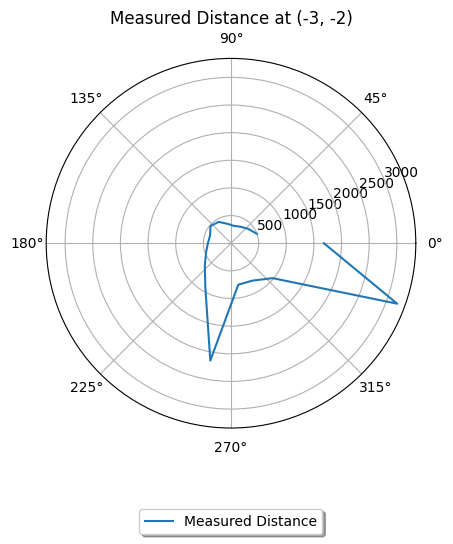

In [313]:
#p5n3_Yaw_f = [ -y+180 for y in p5n3_Yaw ]
plt.polar(np.deg2rad(fixedYaw), outDist, label = "Measured Distance")

plt.title("Measured Distance at (-3, -2)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

In [369]:
import plotly.express as px
df = px.data.wind()
fig = px.scatter_polar(df, r="frequency", theta="direction")
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [524]:
outX_n3n2 = [ d*np.cos((y)*(np.pi/180)) + (-3*304.8) for (d,y) in zip(n3n2_Dist, n3n2_Yaw_f)]
outY_n3n2 = [ d*np.sin((y)*(np.pi/180)) + (-2*304.8) for (d,y) in zip(n3n2_Dist, n3n2_Yaw_f)]

outX_p5p3 = [ d*np.cos((y)*(np.pi/180)) + (5*304.8) for (d,y) in zip(p5p3_Dist, p5p3_Yaw_f)]
outY_p5p3 = [ d*np.sin((y)*(np.pi/180)) + (3*304.8) for (d,y) in zip(p5p3_Dist, p5p3_Yaw_f)]

outX_p0p3 = [ d*np.cos((y)*(np.pi/180)) + (0*304.8) for (d,y) in zip(p0p3_Dist, p0p3_Yaw_f)]
outY_p0p3 = [ d*np.sin((y)*(np.pi/180)) + (3*304.8) for (d,y) in zip(p0p3_Dist, p0p3_Yaw_f)]

outX_p5n3 = [ d*np.cos((y)*(np.pi/180)) + (5*304.8) for (d,y) in zip(p5n3_Dist, p5n3_Yaw_f)]
outY_p5n3 = [ d*np.sin((y)*(np.pi/180)) + (-3*304.8) for (d,y) in zip(p5n3_Dist, p5n3_Yaw_f)]

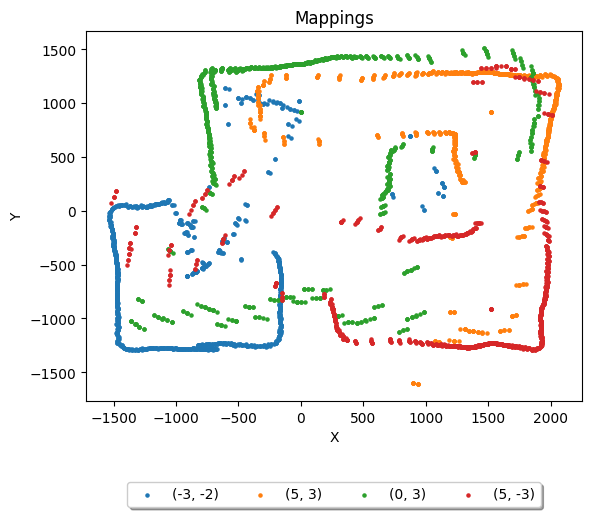

In [566]:
plt.scatter(outX_n3n2, outY_n3n2, label = "(-3, -2)", s= 5)
plt.scatter(outX_p5p3, outY_p5p3, label = "(5, 3)", s= 5)
plt.scatter(outX_p0p3, outY_p0p3, label = "(0, 3)", s= 5)
plt.scatter(outX_p5n3, outY_p5n3, label = "(5, -3)", s= 5)

plt.title("Mappings")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

In [596]:
walls_start = [(-750, 1300), (1900, 1300), (-1500, -1250), (-1500, -1250), (-1500, 0), (-750, 1300)] 
walls_end = [(1900, 1300), (1900, -1250), (1900, -1250), (-1500, 0), (-750, 0), (-750, 0)]
walls_plot_x = [-750, 1900, 1900, 1900, -1500, 1900, -1500, -1500, -1500, -750, -750, -750]
walls_plot_y = [1300, 1300, 1300, -1250, -1250, -1250, -1250, 0, 0, 0, 1300, 0]

box1_start = [(700, 750), (1250, 750), (1250, -200), (700, -200)]
box1_end = [(1250, 750), (1250, -200), (700, -200), (700, 750)]
box1_plot_x = [700, 1250, 1250, 1250, 1250, 700, 700, 700]
box1_plot_y = [750, 750, 750, -200, -200, -200, -200, 750]

box2_start = [(-200, -700), (300, -700), (300, -1200), (-200, -1200)]
box2_end = [(300, -700), (300, -1200), (-200, -1200), (-200, -700)]
box2_plot_x = [-200, 300, 300, 300, 300, -200, -200, -200]
box2_plot_y = [-700, -700, -700, -1200, -1200, -1200, -1200, -700]

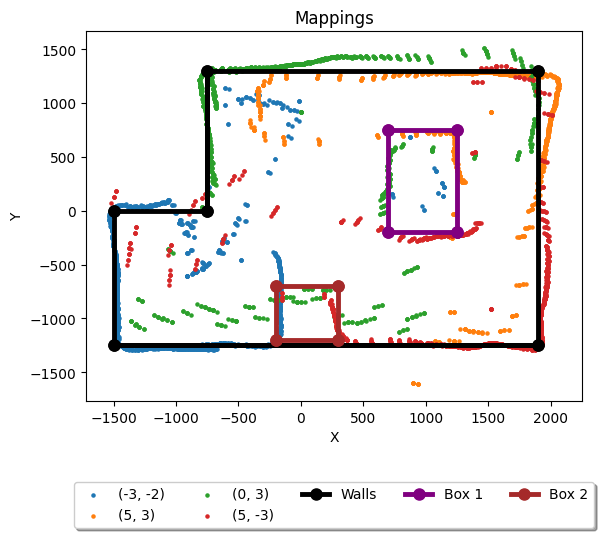

In [601]:
plt.scatter(outX_n3n2, outY_n3n2, label = "(-3, -2)", s= 5)
plt.scatter(outX_p5p3, outY_p5p3, label = "(5, 3)", s= 5)
plt.scatter(outX_p0p3, outY_p0p3, label = "(0, 3)", s= 5)
plt.scatter(outX_p5n3, outY_p5n3, label = "(5, -3)", s= 5)

plt.plot(walls_plot_x, walls_plot_y, color='black', linestyle='solid', marker='o',
     markerfacecolor='black', markersize=8, linewidth=3.5, label = "Walls")

plt.plot(box1_plot_x, box1_plot_y, color='purple', linestyle='solid', marker='o',
     markerfacecolor='purple', markersize=8, linewidth=3.5, label = "Box 1")

plt.plot(box2_plot_x, box2_plot_y, color='brown', linestyle='solid', marker='o',
     markerfacecolor='brown', markersize=8, linewidth=3.5, label = "Box 2")

plt.title("Mappings")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

In [237]:
%store -r p5n3_Yaw
%store -r p5n3_Dist

rYaw = [-p5n3_Yaw[i]+180 for i in range(0, 18*50, 50)]
rDist = [p5n3_Dist[i] for i in range(0, 18*50, 50)]
rDist[0] = 1681
print((rYaw))
print((rDist))



[180, 160, 139, 119, 100, 83, 62, 43, 24, 5, 346, 328, 308, 290, 274, 256, 241, 222]
[1681, 3199, 983, 781, 761, 2156, 928, 618, 479, 418, 403, 484, 446, 356, 318, 345, 405, 498]
